#### 1.Adjusting color intensity and light pixels to pixels

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def adjust_colors(reference_img, target_img, step=0.1):

    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    
    diff = target - ref
    
    adjusted_target = target.copy()
    
    for i in np.arange(0, 1 + step, step):
        adjusted_target = np.clip(adjusted_target - (diff * step), 0, 1)
    
    corrected = (adjusted_target * 255).astype(np.uint8)
    color_diff = (diff * 255).astype(np.uint8)
    
    return corrected, color_diff, diff

In [ ]:
def main():

    reference_img = cv2.imread('set.png')  # ภาพต้นฉบับ
    target_img = cv2.imread('set1.jpg')  # ภาพที่ต้องการวิเคราะห์
    
    if reference_img is None or target_img is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return
    
    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))
    
    corrected_img, color_diff, diff = adjust_colors(reference_img, target_img)
    
    reference_img = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    color_diff = cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB)
    
    fig, axes = plt.subplots(1, 4, figsize=(10, 5))
    axes[0].imshow(reference_img)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img)
    axes[1].set_title("Target Image")
    axes[1].axis("off")
    
    axes[2].imshow(color_diff)
    axes[2].set_title("Color Difference")
    axes[2].axis("off")
    
    axes[3].imshow(corrected_img)
    axes[3].set_title("Corrected Image")
    axes[3].axis("off")
    
    avg_diff = np.mean(np.abs(diff), axis=(0, 1))
    print(f"Average Color Adjustment (RGB): {avg_diff}")
    
    plt.tight_layout()
    plt.show()

Average Color Adjustment (RGB): [0.16880362 0.05546177 0.23804517]


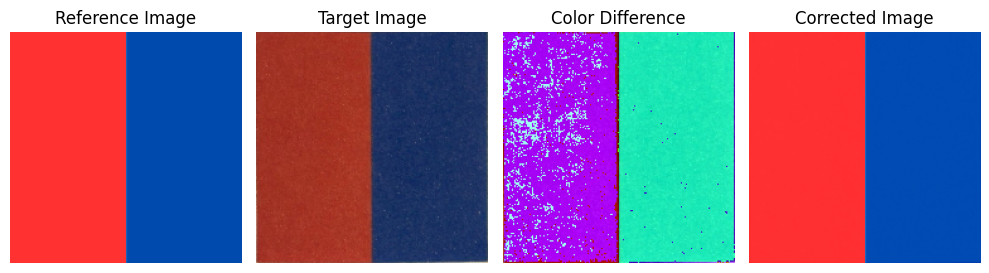

In [29]:
if __name__ == "__main__":
    main()

#### 2.Adjusting color intensity and light all picture

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def adjust_brightness_contrast_stepwise(reference_img, target_img, step=0.01):

    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0

    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)
    
    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()
    
    for i in np.arange(0, 1 + step, step):
        adjusted_target += brightness_diff * step
        adjusted_target = (adjusted_target - 0.5) * (1 + contrast_diff * step) + 0.5
        adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    
    return corrected_img, brightness_diff, contrast_diff

In [4]:
def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

In [5]:
def main():
    reference_img = cv2.imread('set.png')  # ภาพต้นฉบับ
    target_img = cv2.imread('set2.jpg')  # ภาพที่ต้องการวิเคราะห์

    if reference_img is None or target_img is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))
    
    corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast_stepwise(reference_img, target_img)
    
    color_diff = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff, 0, 255).astype(np.uint8)
    
    fig, axes = plt.subplots(1, 4, figsize=(10 , 5))
    
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_rgb)
    axes[1].set_title("Target Image")
    axes[1].axis("off")
    
    axes[2].imshow(color_diff_rgb)
    axes[2].set_title("Color Difference")
    axes[2].axis("off")
    
    axes[3].imshow(corrected_img_rgb)
    axes[3].set_title("Corrected Image")
    axes[3].axis("off")
    
    print(f"Brightness Adjustment: {brightness_diff}")
    print(f"Contrast Adjustment: {contrast_diff}")    

    plt.tight_layout()
    plt.show()
    


Brightness Adjustment: 0.09444215893745422
Contrast Adjustment: 0.1632394641637802


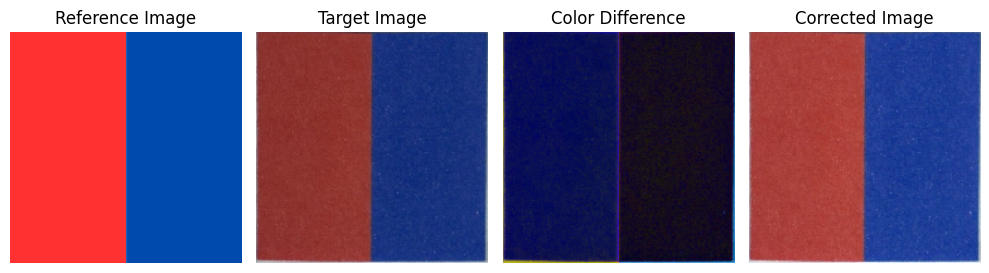

In [6]:
if __name__ == "__main__":
    main()

#### 3.Adjusting color intensity and light all picture + Adjust the tone of the picture.

##### simple adjust

Average color of reference image (RGB): [89.05357372 54.28118834 85.23844449]
Average color of corrected image (RGB): [ 65.78123515  57.83251667 107.46448474]
Average color of warm corrected image (RGB): [ 65.78123515  56.83251667 106.46197754]
Brightness Adjustment: 0.008740603923797607
Contrast Adjustment: -0.02457989752292633
Color Difference: [ 0.09149805 -0.01387693 -0.08694094]


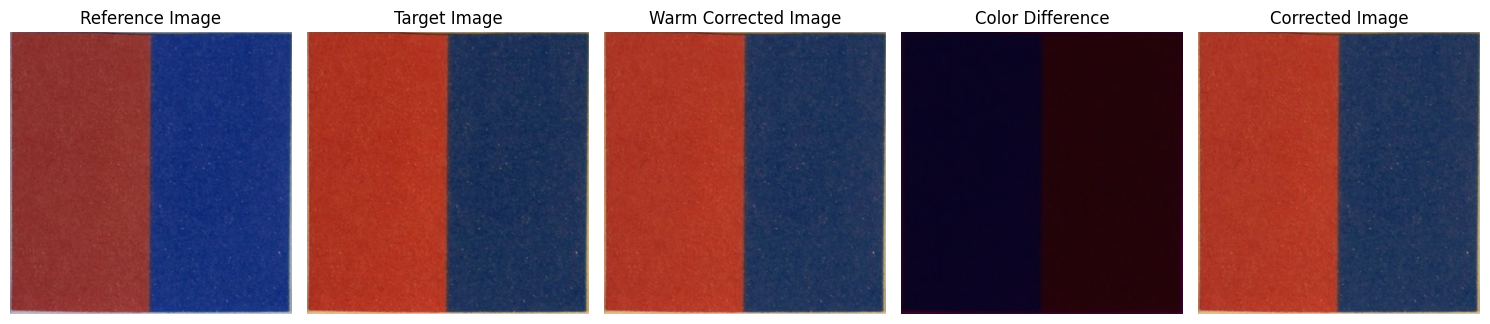

In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness_contrast(reference_img, target_img, step=0.0001):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()
    
    adjusted_target += brightness_diff

    adjusted_target = (adjusted_target - 0.5) * (1 + contrast_diff) + 0.5
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.01):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color
    adjusted_target = target_img.copy()

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)  # ปรับสีน้ำเงิน
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)  # ปรับสีเขียว
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)  # ปรับสีแดง

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def main():
    reference_img = cv2.imread('set2.jpg')  # ภาพต้นฉบับ
    target_img = cv2.imread('set1.jpg')  # ภาพที่ต้องการวิเคราะห์

    if reference_img is None or target_img is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)

    warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.05)

    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 5)) 
    
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_rgb)
    axes[1].set_title("Target Image")
    axes[1].axis("off")
    
    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")
    
    axes[3].imshow(color_diff_rgb)
    axes[3].set_title("Color Difference")
    axes[3].axis("off")
    
    axes[4].imshow(corrected_img_rgb)
    axes[4].set_title("Corrected Image")
    axes[4].axis("off")

    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    print(f"Brightness Adjustment: {brightness_diff}")
    print(f"Contrast Adjustment: {contrast_diff}")
    print(f"Color Difference: {color_diff}")

    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    main()


##### advance adjust

Average color of reference image (RGB): [140.20284986 142.45219899 166.95971557]
Average color of corrected image (RGB): [139.78250889 141.6271101  166.00688671]
Average color of warm corrected image (RGB): [139.78250889 141.6271101  166.00688671]
Average color of true corrected image (RGB): [124.78600823 126.87326783 154.27387251]
Total Brightness Adjustment: -0.09620273113250732
Total Contrast Adjustment: 0.12592840194702148
Total Color Difference: 0.045503730230848305


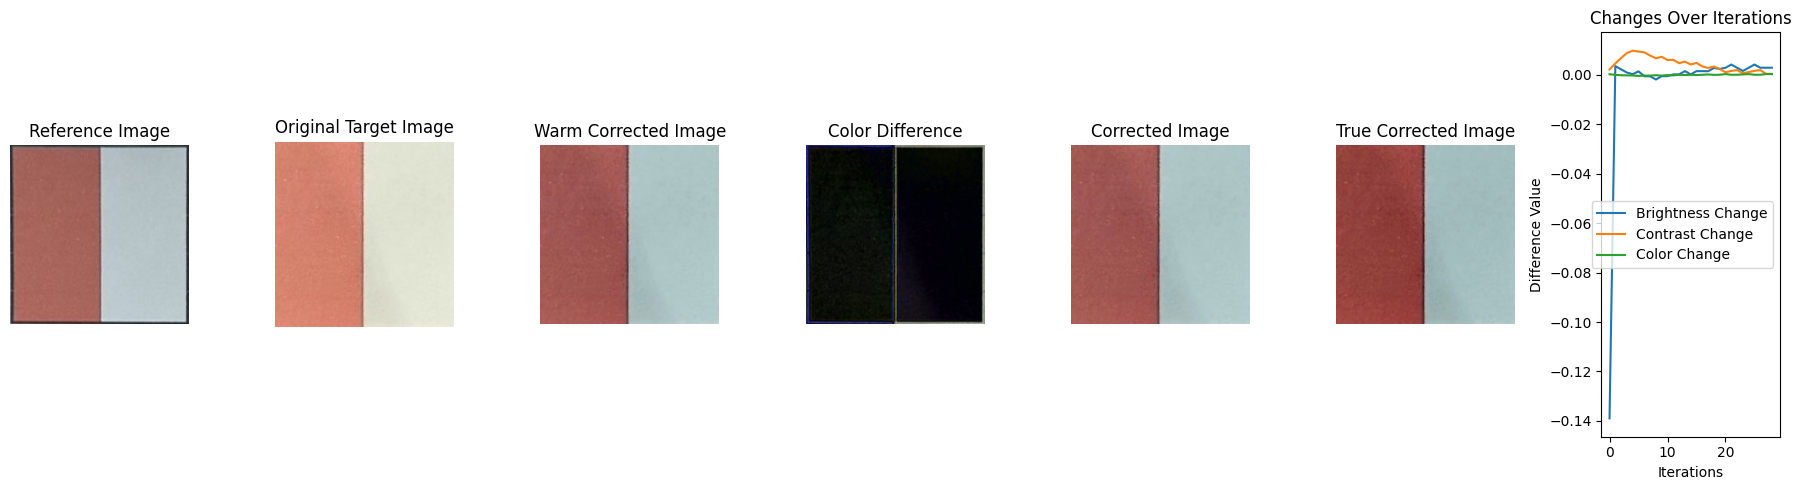

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.001) * (1 + contrast_diff) + 0.001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.0001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def apply_adjustments(target_img, brightness_diff, contrast_diff, color_diff):
    # แปลงภาพเป็น float32 เพื่อการคำนวณที่แม่นยำ
    target_img = target_img.astype(np.float32) / 255.0

    # ปรับค่าความสว่าง
    target_img += brightness_diff

    # ปรับคอนทราสต์
    target_img = (target_img - 0.5) * (1 + contrast_diff) + 0.5

    # ปรับโทนสี (R, G, B)
    target_img[:, :, 0] += color_diff[0]
    target_img[:, :, 1] += color_diff[1]
    target_img[:, :, 2] += color_diff[2]

    # คำนวณภาพสุดท้ายหลังการปรับ
    target_img = np.clip(target_img, 0, 1)

    # แปลงกลับเป็น uint8 และ return
    return (target_img * 255).astype(np.uint8)

# ในส่วนของฟังก์ชัน main
def main():
    reference_img = cv2.imread('wtest2.jpg')  # ภาพต้นฉบับ
    target_img = cv2.imread('cp1.jpg')  # ภาพที่ต้องการวิเคราะห์

    target_img_as = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    if reference_img is None or target_img is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    # สร้างลิสต์เก็บค่าที่เปลี่ยนแปลง
    brightness_changes = []
    contrast_changes = []
    color_changes = []

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0

    while True:
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.00001)

        # เก็บค่าการเปลี่ยนแปลง
        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # Average color difference

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        target_img = warm_corrected_img

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff

    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)
    
    # ใช้ apply_adjustments สำหรับการปรับภาพใหม่
    true_corrected_img = apply_adjustments(
        target_img, 
        total_brightness_change, 
        total_contrast_change, 
        np.array([total_color_change] * 3)  # ใช้ค่าเฉลี่ยของ total_color_change สำหรับ RGB
    )
    
    # แสดงผลลัพธ์
    true_corrected_img_rgb = cv2.cvtColor(true_corrected_img, cv2.COLOR_BGR2RGB)

    # Plot the images
    fig, axes = plt.subplots(1, 7, figsize=(18, 5))  # เพิ่มคอลัมน์ให้มากขึ้นเป็น 7
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_as)
    axes[1].set_title("Original Target Image")  # Title for the original target image
    axes[1].axis("off")
    
    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")
    
    axes[3].imshow(color_diff_rgb)
    axes[3].set_title("Color Difference")
    axes[3].axis("off")
    
    axes[4].imshow(corrected_img_rgb)
    axes[4].set_title("Corrected Image")
    axes[4].axis("off")

    # เพิ่มภาพที่ปรับแล้วในชื่อ "True"
    axes[5].imshow(true_corrected_img_rgb)
    axes[5].set_title("True Corrected Image")
    axes[5].axis("off")

    # Plotting total changes
    axes[6].plot(brightness_changes, label="Brightness Change")
    axes[6].plot(contrast_changes, label="Contrast Change")
    axes[6].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[6].set_title("Changes Over Iterations")
    axes[6].set_xlabel("Iterations")
    axes[6].set_ylabel("Difference Value")
    axes[6].legend()

    # Print average colors
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))
    true_corrected_avg_color = np.mean(true_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    print(f"Average color of true corrected image (RGB): {true_corrected_avg_color}")
    
    # Display changes
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Average color of reference image (RGB): [140.20284986 142.45219899 166.95971557]
Average color of corrected image (RGB): [139.78250889 141.6271101  166.00688671]
Average color of warm corrected image (RGB): [139.78250889 141.6271101  166.00688671]
Total Brightness Adjustment: -0.09620273113250732
Total Contrast Adjustment: 0.12592840194702148
Total Color Difference: 0.045503730230848305
Total RGB Changes (R, G, B): [ 2290.8076     -29.907494 -2356.0493  ]


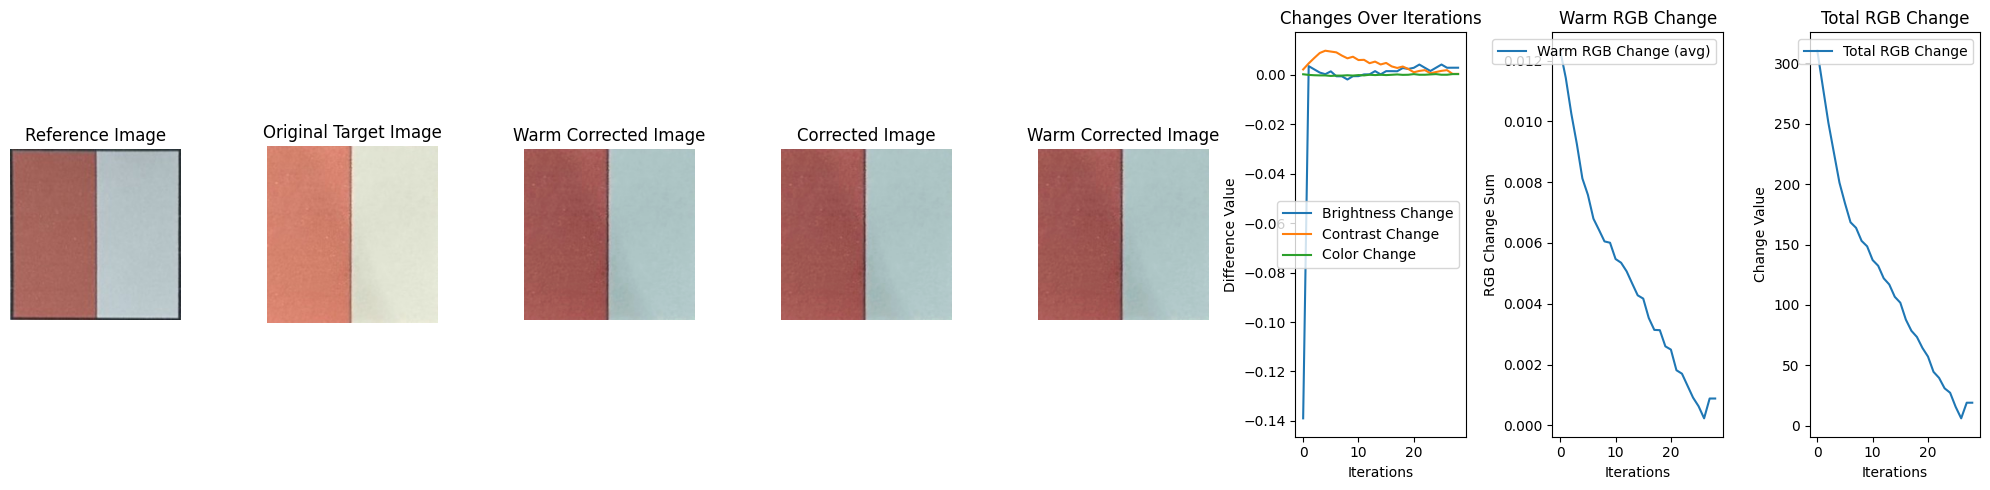

In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.001) * (1 + contrast_diff) + 0.001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.0001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    # Track the change in each channel (RGB) per pixel
    rgb_changes = adjusted_target - target_img  # per-pixel RGB changes

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    # Sum the total RGB changes for all pixels (per channel)
    total_rgb_changes = np.sum(rgb_changes, axis=(0, 1))  # Sum per channel (R, G, B)
    
    return (adjusted_target * 255).astype(np.uint8), color_diff, rgb_changes, total_rgb_changes

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def apply_adjustments(target_img, brightness_diff, contrast_diff, color_diff):
    # แปลงภาพเป็น float32 เพื่อการคำนวณที่แม่นยำ
    target_img = target_img.astype(np.float32) / 255.0

    # ปรับค่าความสว่าง
    target_img += brightness_diff

    # ปรับคอนทราสต์
    target_img = (target_img - 0.5) * (1 + contrast_diff) + 0.5

    # ปรับโทนสี (R, G, B)
    target_img[:, :, 0] += color_diff[0]
    target_img[:, :, 1] += color_diff[1]
    target_img[:, :, 2] += color_diff[2]

    # คำนวณภาพสุดท้ายหลังการปรับ
    target_img = np.clip(target_img, 0, 1)

    # แปลงกลับเป็น uint8 และ return
    return (target_img * 255).astype(np.uint8)

# ในส่วนของฟังก์ชัน main
def main():
    reference_img = cv2.imread('wtest2.jpg')  # Reference image
    target_img = cv2.imread('cp1.jpg')  # Target image for analysis

    target_img_as = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    if reference_img is None or target_img is None:
        print("Error: Unable to load images")
        return

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    # Track changes in brightness, contrast, color, and warm color
    brightness_changes = []
    contrast_changes = []
    color_changes = []
    warm_color_changes = []  # Track RGB changes for warm adjustment
    total_rgb_changes_overall = []  # Track total RGB changes for each iteration

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0

    while True:
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        warm_corrected_img, color_diff, warm_rgb_changes, total_rgb_changes = adjust_tone(reference_img, corrected_img, step=0.00001)

        # Collect the changes
        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)
        warm_color_changes.append(np.mean(np.abs(warm_rgb_changes), axis=(0, 1)))  # Track average RGB change for warm
        total_rgb_changes_overall.append(total_rgb_changes)  # Track total RGB changes

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # Average color difference

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        target_img = warm_corrected_img

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff

    # Show results
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)

    # Plot the changes
    fig, axes = plt.subplots(1, 8, figsize=(20, 5))  # Increase the number of columns to 8
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")

    axes[1].imshow(target_img_as)
    axes[1].set_title("Original Target Image")
    axes[1].axis("off")

    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")

    axes[3].imshow(corrected_img_rgb)
    axes[3].set_title("Corrected Image")
    axes[3].axis("off")

    axes[4].imshow(warm_corrected_img_rgb)
    axes[4].set_title("Warm Corrected Image")
    axes[4].axis("off")

    # Plotting the changes
    axes[5].plot(brightness_changes, label="Brightness Change")
    axes[5].plot(contrast_changes, label="Contrast Change")
    axes[5].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[5].set_title("Changes Over Iterations")
    axes[5].set_xlabel("Iterations")
    axes[5].set_ylabel("Difference Value")
    axes[5].legend()

    axes[6].plot([change.sum() for change in warm_color_changes], label="Warm RGB Change (avg)")
    axes[6].set_title("Warm RGB Change")
    axes[6].set_xlabel("Iterations")
    axes[6].set_ylabel("RGB Change Sum")
    axes[6].legend()

    # Plot the total RGB changes per iteration
    axes[7].plot([np.linalg.norm(change) for change in total_rgb_changes_overall], label="Total RGB Change")
    axes[7].set_title("Total RGB Change")
    axes[7].set_xlabel("Iterations")
    axes[7].set_ylabel("Change Value")
    axes[7].legend()

    # Print average colors
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")

    # Display total changes
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    # Print total RGB changes (summed for all iterations)
    total_rgb_change = np.sum(total_rgb_changes_overall, axis=0)  # Sum total RGB changes
    print(f"Total RGB Changes (R, G, B): {total_rgb_change}")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

#### 4.indicater detection

##### simple indicater detect

In [9]:
import cv2
import numpy as np

def detect_colors(image_path):
    # Load image
    image = cv2.imread('6ad.png')
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define color ranges (HSV)
    color_ranges = {
        'Red': [(0, 50, 50), (10, 255, 255)],
        'Yellow': [(15, 50, 50), (45, 255, 255)],
        'Black': [(0, 0, 0), (180, 255, 60)],
        'Blue': [(85, 50, 50), (135, 255, 255)]
    }
    
    detected_objects = []
    color_positions = {}
    
    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)
        
        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # Filter small areas
                x, y, w, h = cv2.boundingRect(cnt)
                detected_objects.append((color, x, y, w, h))
                color_positions[color] = (x, y, w, h)
                cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 2)
                cv2.putText(image, color, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    # Debugging: Print detected positions
    print("Detected Colors and Positions:")
    for color, pos in color_positions.items():
        print(f"{color}: {pos}")
    
    # Calculate distance between specific color pairs
    def calculate_distance(color_1, color_2):
        if color_1 in color_positions and color_2 in color_positions:
            x1, y1, w1, h1 = color_positions[color_1]
            x2, y2, w2, h2 = color_positions[color_2]
            center_1 = (x1 + w1 // 2, y1 + h1 // 2)
            center_2 = (x2 + w2 // 2, y2 + h2 // 2)
            dist_x = abs(center_1[0] - center_2[0])
            dist_y = abs(center_1[1] - center_2[1])
            distance = np.sqrt(dist_x**2 + dist_y**2)
            return distance
        else:
            return None
    
    # Find distances for specific pairs
    pairs = [
        ('Red', 'Yellow'),
        ('Black', 'Blue'),
        ('Red', 'Black'),
        ('Yellow', 'Blue')
    ]
    
    distances = {}
    
    for pair in pairs:
        color_1, color_2 = pair
        distance = calculate_distance(color_1, color_2)
        if distance is not None:
            distances[(color_1, color_2)] = distance
            print(f"Distance between {color_1} and {color_2}: {distance:.2f} pixels")
        else:
            print(f"{color_1} or {color_2} not detected!")
    
    # Check if differences in distances are within 10 pixels
    tolerance = 10  # Set maximum tolerance for distance difference (in pixels)
    print("\nChecking if distance differences between pairs are within 10 pixels:")
    
    within_tolerance = True  # Flag to check if all conditions are met
    
    for pair_1 in pairs:
        for pair_2 in pairs:
            if pair_1 != pair_2:
                dist_1 = distances.get(pair_1)
                dist_2 = distances.get(pair_2)
                
                if dist_1 is not None and dist_2 is not None:
                    diff = abs(dist_1 - dist_2)
                    if diff > tolerance:
                        print(f"Difference between {pair_1} and {pair_2} is {diff:.2f} pixels, which is greater than tolerance!")
                        within_tolerance = False
                    else:
                        print(f"Difference between {pair_1} and {pair_2} is {diff:.2f} pixels (within tolerance)")
    
    # If all conditions are met, draw a bounding box around all detected objects
    if within_tolerance:
        print("\nAll conditions met. Drawing bounding box around all detected objects.")
        
        # Calculate the bounding box for all detected colors
        all_x = [pos[0] for pos in color_positions.values()]
        all_y = [pos[1] for pos in color_positions.values()]
        all_w = [pos[2] for pos in color_positions.values()]
        all_h = [pos[3] for pos in color_positions.values()]
        
        min_x = min(all_x)
        min_y = min(all_y)
        max_x = max([x + w for x, w in zip(all_x, all_w)])
        max_y = max([y + h for y, h in zip(all_y, all_h)])
        
        # Draw a green rectangle around all detected objects
        cv2.rectangle(image, (min_x, min_y), (max_x, max_y), (0, 255, 0), 2)
    
    # Show result
    cv2.imshow("Detected Colors", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return detected_objects

# Example usage
detect_colors("path_to_target_image.png")


Detected Colors and Positions:
Red: (164, 300, 164, 164)
Yellow: (328, 300, 164, 164)
Black: (164, 464, 164, 164)
Blue: (328, 464, 164, 164)
Distance between Red and Yellow: 164.00 pixels
Distance between Black and Blue: 164.00 pixels
Distance between Red and Black: 164.00 pixels
Distance between Yellow and Blue: 164.00 pixels

Checking if distance differences between pairs are within 10 pixels:
Difference between ('Red', 'Yellow') and ('Black', 'Blue') is 0.00 pixels (within tolerance)
Difference between ('Red', 'Yellow') and ('Red', 'Black') is 0.00 pixels (within tolerance)
Difference between ('Red', 'Yellow') and ('Yellow', 'Blue') is 0.00 pixels (within tolerance)
Difference between ('Black', 'Blue') and ('Red', 'Yellow') is 0.00 pixels (within tolerance)
Difference between ('Black', 'Blue') and ('Red', 'Black') is 0.00 pixels (within tolerance)
Difference between ('Black', 'Blue') and ('Yellow', 'Blue') is 0.00 pixels (within tolerance)
Difference between ('Red', 'Black') and ('R

[('Red', 164, 300, 164, 164),
 ('Yellow', 328, 300, 164, 164),
 ('Black', 164, 464, 164, 164),
 ('Blue', 328, 464, 164, 164)]

In [173]:
from PIL import Image
import collections

# เปิดภาพ
image_path = 'set3.jpg'
img = Image.open(image_path)

# เปลี่ยนภาพเป็นโหมด RGB
img = img.convert('RGB')

# ดึงข้อมูลสีจากพิกเซลทั้งหมดในภาพ
pixels = list(img.getdata())

# ใช้ collections.Counter เพื่อนับความถี่ของสีที่ปรากฏ
color_counts = collections.Counter(pixels)

# แสดง 10 สีที่พบมากที่สุด
most_common_colors = color_counts.most_common(2)

print("10 สีที่พบมากที่สุดในภาพ:")
for color, count in most_common_colors:
    print(f"สี {color} ปรากฏ {count} ครั้ง")


10 สีที่พบมากที่สุดในภาพ:
สี (65, 49, 59) ปรากฏ 1090 ครั้ง
สี (66, 50, 60) ปรากฏ 972 ครั้ง


Detected Color Positions:
Color 1 (255, 49, 49): (313, 320, 267, 528)
Color 2 (0, 74, 173): (579, 313, 270, 536)
Combined Bounding Box: (313, 313, 849, 849)


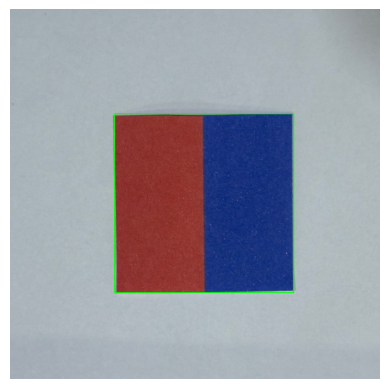

[('Color 1 (255, 49, 49)', 313, 320, 267, 528),
 ('Color 2 (0, 74, 173)', 579, 313, 270, 536)]

In [162]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    # Load image
    image = cv2.imread('set.jpg')
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Color 1 (255, 49, 49)': [(0, 100, 100), (10, 255, 255)],  # Red color range
        'Color 2 (0, 74, 173)': [(100, 100, 100), (130, 255, 255)]  # Blue color range
    }
    
    color_positions = []
    combined_bbox = None  # To store the combined bounding box coordinates
    
    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)
        
        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # Filter small areas

                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))
                

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),  # Min x
                        min(combined_bbox[1], y),  # Min y
                        max(combined_bbox[2], x + w),  # Max x
                        max(combined_bbox[3], y + h)   # Max y
                    )
    

    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")
    

    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
    else:
        print("No valid colors detected!")
    

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    return color_positions

detect_colors("path_to_target_image.png")


Detected Color Positions:
Color 1 (255, 49, 49): (4, 2, 262, 530)
Combined Bounding Box: (4, 2, 266, 532)


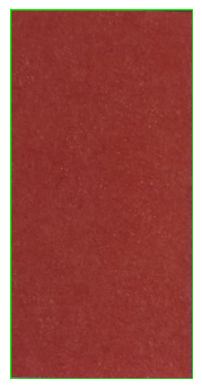

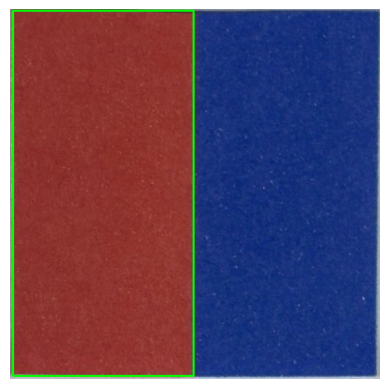

In [177]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    # Load image
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Color 1 (255, 49, 49)': [(0, 100, 100), (10, 255, 255)],  # Red color range
        'Color 2 (0, 74, 173)': [(100, 100, 100), (100, 255, 255)]  # Blue color range
    }
    
    color_positions = []
    combined_bbox = None  # To store the combined bounding box coordinates
    
    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)
        
        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # Filter small areas

                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))
                
                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),  # Min x
                        min(combined_bbox[1], y),  # Min y
                        max(combined_bbox[2], x + w),  # Max x
                        max(combined_bbox[3], y + h)   # Max y
                    )
    
    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")
    

    # Crop and display the combined bounding box
    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        # Crop the image using the combined bounding box
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        
        # Show cropped combined image
        plt.imshow(cropped_img_rgb)
        plt.axis('off')
        plt.show()
    else:
        print("No valid colors detected!")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    return

detect_colors("set2.jpg")


##### advance indicater detect

Pixels matching Red: 32897
Pixels matching White: 32490
Detected Color Positions:
Red: (14, 67, 134, 262)
White: (144, 66, 133, 258)
Combined Bounding Box: (14, 66, 277, 329)


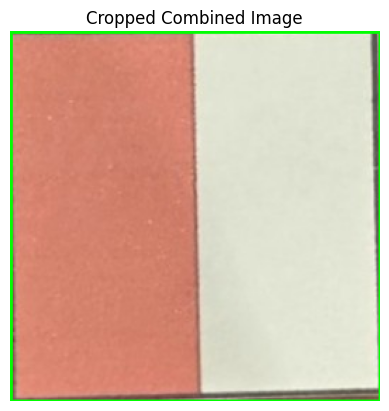

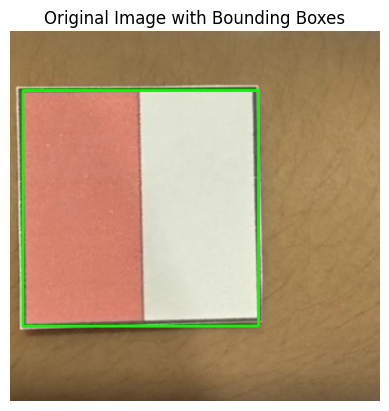

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded correctly.")
        return

    # ลด noise ก่อนแปลงภาพ
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    hsv = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Red': [(0, 100, 100), (10, 255, 255)],  
        'White': [(0, 0, 150), (180, 80, 255)]  # เพิ่ม S และลด V เล็กน้อยให้ค่อนไปทางเหลือง
    }

    color_positions = []
    combined_bbox = None

    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)

        # ลองเพิ่มการ Morphological Transform เพื่อลบ noise ออกจาก mask
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        matching_pixels = np.sum(mask > 0)
        print(f"Pixels matching {color}: {matching_pixels}")

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # ลดเงื่อนไขลงเพื่อให้หาเจอง่ายขึ้น
                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),
                        min(combined_bbox[1], y),
                        max(combined_bbox[2], x + w),
                        max(combined_bbox[3], y + h)
                    )

    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")

    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

        plt.imshow(cropped_img_rgb)
        plt.axis('off')
        plt.title("Cropped Combined Image")
        plt.show()
    else:
        print("No valid colors detected!")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Original Image with Bounding Boxes")
    plt.show()

detect_colors("wtest8.jpg")


#### Finaly program

##### 1.

Pixels matching Orange: 134722
Pixels matching Maroon: 144075
Detected Color Positions:
Orange: (313, 320, 267, 528)
Maroon: (571, 311, 279, 539)
Combined Bounding Box: (313, 311, 850, 850)
Average color of reference image (RGB): [ 62.37044897  54.21597328 105.30016056]
Average color of corrected image (RGB): [ 62.20132885  53.87897104 103.24771733]
Average color of warm corrected image (RGB): [ 62.20132885  53.87897104 103.24771733]
Total Brightness Adjustment: 0.06000995635986328
Total Contrast Adjustment: 0.09308700263500214
Total Color Difference: 0.060188036964973435


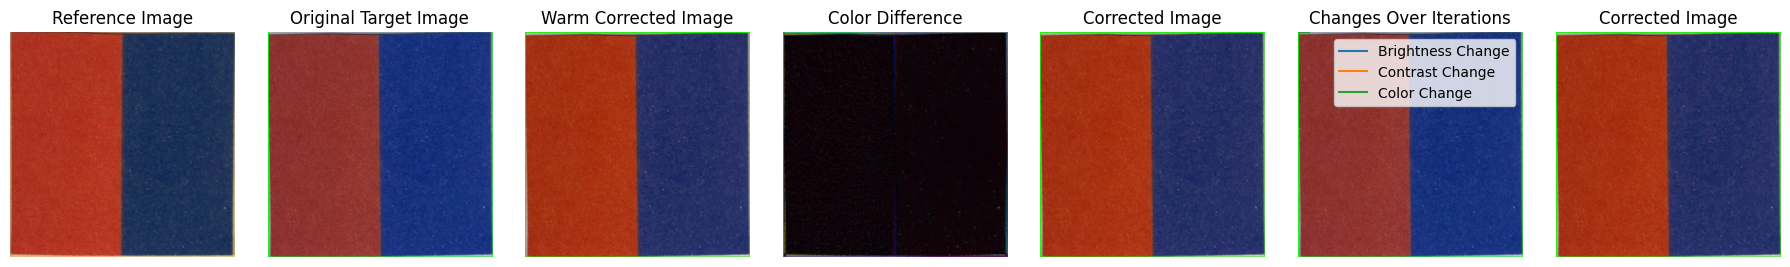

In [193]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded correctly.")
        return
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    color_ranges = {
        'Orange': [(0, 100, 100), (10, 255, 255)],
        'Maroon': [(100, 50, 50), (170, 255, 255)]
    }
    color_positions = []
    combined_bbox = None
    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)
        matching_pixels = np.sum(mask > 0)
        print(f"Pixels matching {color}: {matching_pixels}")
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            if cv2.contourArea(cnt) > 1000:  # Increased area threshold
                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),
                        min(combined_bbox[1], y),
                        max(combined_bbox[2], x + w),
                        max(combined_bbox[3], y + h)
                    )
    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")
    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        
        # Convert cropped image to RGB
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        return cropped_img_rgb  # Return cropped image for further use
    else:
        print("No valid colors detected!")
        return None

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.001) * (1 + contrast_diff) + 0.001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.0001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def main():
    reference_img = cv2.imread('set1.jpg')  # ภาพต้นฉบับ
    target_img = cv2.imread('set.jpg')  # ภาพที่ต้องการวิเคราะห์

    cropped_img_rgb = detect_colors("set.jpg")  # Get cropped RGB image from color detection

    if reference_img is None or target_img is None or cropped_img_rgb is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return
    target_img = cv2.cvtColor(cropped_img_rgb, cv2.COLOR_BGR2RGB)
    target_img_as = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    # สร้างลิสต์เก็บค่าที่เปลี่ยนแปลง
    brightness_changes = []
    contrast_changes = []
    color_changes = []

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0

    while True:
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.00001)

        # เก็บค่าการเปลี่ยนแปลง
        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # Average color difference

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        target_img = warm_corrected_img

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff

    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)

    # Plot the images
    fig, axes = plt.subplots(1, 7, figsize=(18, 5))  # Increase the number of columns to 7
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_as)
    axes[1].set_title("Original Target Image")  # Title for the original target image
    axes[1].axis("off")
    
    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")
    
    axes[3].imshow(color_diff_rgb)
    axes[3].set_title("Color Difference")
    axes[3].axis("off")
    
    axes[4].imshow(corrected_img_rgb)
    axes[4].set_title("Corrected Image")
    axes[4].axis("off")
    
    axes[5].imshow(cropped_img_rgb)  # Display the cropped image
    axes[5].set_title("Cropped Image")
    axes[5].axis("off")

    axes[6].imshow(corrected_img_rgb)
    axes[6].set_title("Corrected Image")
    axes[6].axis("off")

    # Plotting total changes
    axes[5].plot(brightness_changes, label="Brightness Change")
    axes[5].plot(contrast_changes, label="Contrast Change")
    axes[5].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[5].set_title("Changes Over Iterations")
    axes[5].set_xlabel("Iterations")
    axes[5].set_ylabel("Difference Value")
    axes[5].legend()

    # Print average colors
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    
    # Display changes
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


##### 2.

Pixels matching Red: 6907
Pixels matching Red2: 0
Pixels matching Blue: 6985
Detected Color Positions:
Red: (165, 103, 61, 116)
Blue: (229, 102, 62, 117)
Combined Bounding Box: (165, 102, 291, 219)
Average color of reference image (RGB): [89.05357372 54.28118834 85.23844449]
Average color of corrected image (RGB): [74.57818975 64.89876859 89.98525154]
Average color of warm corrected image (RGB): [75.57818975 62.89876859 89.02977435]
Total Brightness Adjustment: -0.1890193223953247
Total Contrast Adjustment: 0.0486149936914444
Total Color Difference: 0.023326295195147395


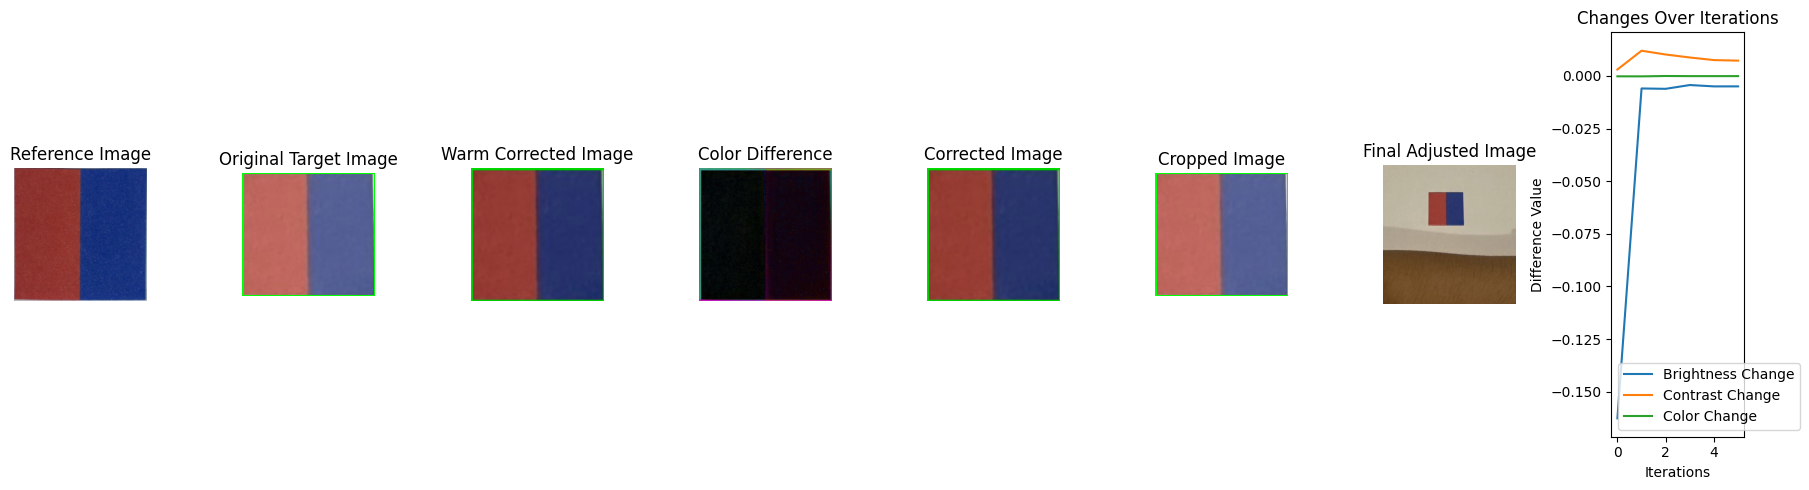

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded correctly.")
        return

    # ลด noise ก่อนแปลงภาพ
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    hsv = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Red': [(0, 100, 100), (10, 255, 255)],  
        'Red2': [(160, 100, 100), (180, 255, 255)],  
        'Blue': [(90, 50, 50), (130, 255, 255)]  # ปรับช่วงของสีฟ้าให้กว้างขึ้น
    }

    color_positions = []
    combined_bbox = None

    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)

        # ลองเพิ่มการ Morphological Transform เพื่อลบ noise ออกจาก mask
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        matching_pixels = np.sum(mask > 0)
        print(f"Pixels matching {color}: {matching_pixels}")

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # ลดเงื่อนไขลงเพื่อให้หาเจอง่ายขึ้น
                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),
                        min(combined_bbox[1], y),
                        max(combined_bbox[2], x + w),
                        max(combined_bbox[3], y + h)
                    )

    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")

    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        
        # Convert cropped image to RGB
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        return cropped_img_rgb  # Return cropped image for further use
    else:
        print("No valid colors detected!")
        return None

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.0001) * (1 + contrast_diff) + 0.0001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.0001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def apply_total_adjustments(target_img, total_brightness_change, total_contrast_change, total_color_change):
    # Convert target image to float32 for precise adjustments
    target_img = target_img.astype(np.float32) / 255.0
    
    # Apply total brightness adjustment across the whole image
    target_img += total_brightness_change
    target_img = np.clip(target_img, 0, 1)  # Ensure pixel values are within range

    # Apply total contrast adjustment across the whole image
    contrast_factor = 1 + total_contrast_change
    target_img = (target_img - 0.001) * contrast_factor + 0.001
    target_img = np.clip(target_img, 0, 1)  # Ensure pixel values are within range

    # Apply total color adjustment across the whole image
    target_img += total_color_change
    target_img = np.clip(target_img, 0, 1)  # Ensure pixel values are within range

    # Convert back to uint8 format
    adjusted_img = (target_img * 255).astype(np.uint8)
    
    return adjusted_img

def main():
    reference_img = cv2.imread('set2.jpg')  # ภาพต้นฉบับ
    target_img = cv2.imread('test3.jpg')  # ภาพที่ต้องการวิเคราะห์

    cropped_img_rgb = detect_colors("test3.jpg")  # Get cropped RGB image from color detection

    if reference_img is None or target_img is None or cropped_img_rgb is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img_ts = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.cvtColor(cropped_img_rgb, cv2.COLOR_BGR2RGB)
    target_img_as = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    adjusted_img = target_img_ts

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    # สร้างลิสต์เก็บค่าที่เปลี่ยนแปลง
    brightness_changes = []
    contrast_changes = []
    color_changes = []

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0

    while True:
        # ปรับ brightness และ contrast
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        
        # ปรับ tone สีของภาพ
        warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.00001)

        # สะสมค่าการเปลี่ยนแปลง
        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # ใช้ค่าเฉลี่ยของ color difference

        # ✅ อัปเดต target_img โดยใช้ค่าการเปลี่ยนแปลงที่สะสมไว้ แทนที่จะใช้ warm_corrected_img โดยตรง
        target_img = apply_total_adjustments(target_img, brightness_diff, contrast_diff, np.mean(np.abs(color_diff)))

        # ✅ อัปเดต adjusted_img ด้วยค่าที่สะสมแล้ว
        adjusted_img = apply_total_adjustments(adjusted_img, brightness_diff, contrast_diff, np.mean(np.abs(color_diff)))

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff


    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)

    
    # Plot the images
    fig, axes = plt.subplots(1, 8, figsize=(18, 5))  # Increase the number of columns to 8
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_as)
    axes[1].set_title("Original Target Image")
    axes[1].axis("off")
    
    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")
    
    axes[3].imshow(color_diff_rgb)
    axes[3].set_title("Color Difference")
    axes[3].axis("off")
    
    axes[4].imshow(corrected_img_rgb)
    axes[4].set_title("Corrected Image")
    axes[4].axis("off")
    
    axes[5].imshow(cropped_img_rgb)  # Display the cropped image
    axes[5].set_title("Cropped Image")
    axes[5].axis("off")

    axes[6].imshow(adjusted_img)  # Display the final adjusted image
    axes[6].set_title("Final Adjusted Image")
    axes[6].axis("off")

    # Plotting total changes
    axes[7].plot(brightness_changes, label="Brightness Change")
    axes[7].plot(contrast_changes, label="Contrast Change")
    axes[7].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[7].set_title("Changes Over Iterations")
    axes[7].set_xlabel("Iterations")
    axes[7].set_ylabel("Difference Value")
    axes[7].legend()

    # Print average colors
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    
    # Display changes
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    cv2.imwrite("adjusted_image5.jpg", cv2.cvtColor(adjusted_img, cv2.COLOR_RGB2BGR))
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


Pixels matching Red: 28124
Pixels matching Red2: 0
Pixels matching White: 32014
Detected Color Positions:
Red: (9, 53, 125, 249)
White: (134, 47, 132, 256)
Combined Bounding Box: (9, 47, 266, 303)
Average color of reference image (RGB): [140.20284986 142.45219899 166.95971557]
Average color of corrected image (RGB): [138.526581   142.09859746 166.44634809]
Average color of warm corrected image (RGB): [138.526581   142.09859746 166.44634809]
Total Brightness Adjustment: -0.08540451526641846
Total Contrast Adjustment: 0.04282389581203461
Total Color Difference: 0.02723831159528345


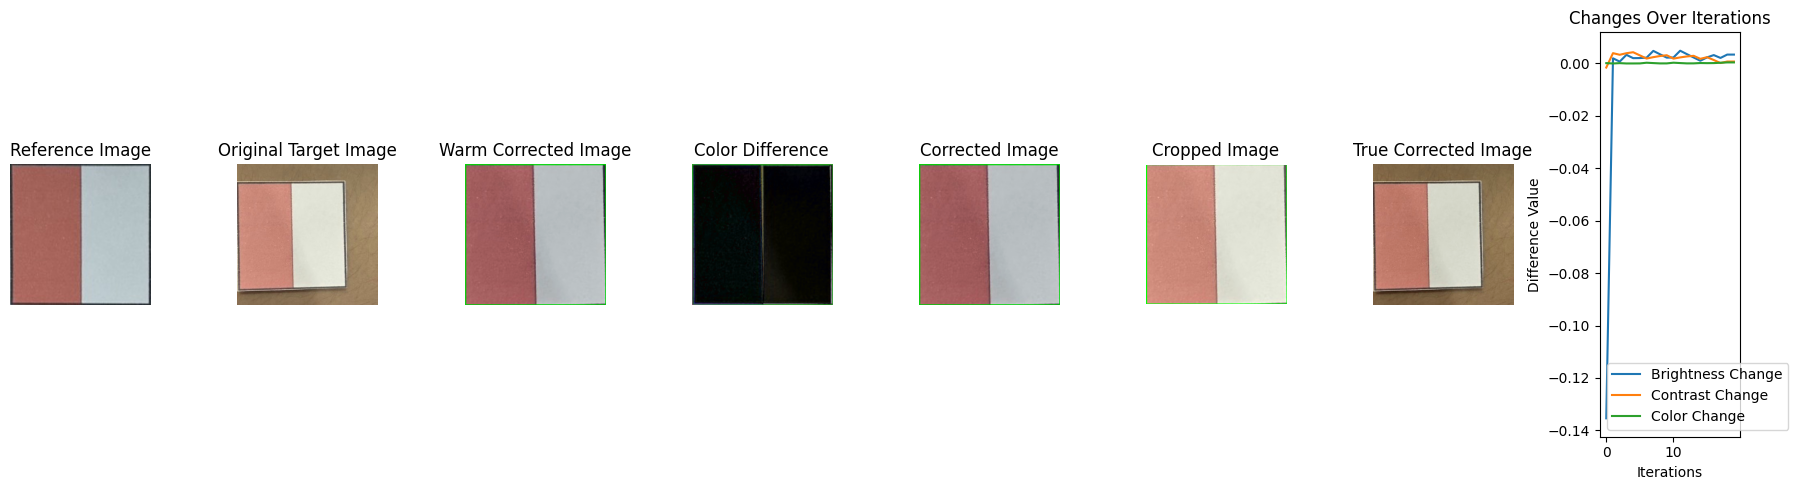

In [143]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded correctly.")
        return

    # ลด noise ก่อนแปลงภาพ
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    hsv = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Red': [(0, 100, 100), (10, 255, 255)],  
        'Red2': [(160, 100, 100), (180, 255, 255)],  
        'White': [(0, 0, 180), (180, 50, 255)]  # ปรับช่วงของสีขาว
    }


    color_positions = []
    combined_bbox = None

    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)

        # ลองเพิ่มการ Morphological Transform เพื่อลบ noise ออกจาก mask
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        matching_pixels = np.sum(mask > 0)
        print(f"Pixels matching {color}: {matching_pixels}")

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # ลดเงื่อนไขลงเพื่อให้หาเจอง่ายขึ้น
                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),
                        min(combined_bbox[1], y),
                        max(combined_bbox[2], x + w),
                        max(combined_bbox[3], y + h)
                    )

    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")

    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        
        # Convert cropped image to RGB
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        return cropped_img_rgb  # Return cropped image for further use
    else:
        print("No valid colors detected!")
        return None

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.001) * (1 + contrast_diff) + 0.001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.0001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def apply_adjustments(target_img, brightness_diff, contrast_diff, color_diff):
    # แปลงภาพเป็น float32 เพื่อการคำนวณที่แม่นยำ
    target_img = target_img.astype(np.float32) / 255.0

    # ปรับค่าความสว่าง
    target_img += brightness_diff

    # ปรับคอนทราสต์
    target_img = (target_img - 0.5) * (1 + contrast_diff) + 0.5

    # ปรับโทนสี (R, G, B)
    target_img[:, :, 0] += color_diff[0]
    target_img[:, :, 1] += color_diff[1]
    target_img[:, :, 2] += color_diff[2]

    # คำนวณภาพสุดท้ายหลังการปรับ
    target_img = np.clip(target_img, 0, 1)

    # แปลงกลับเป็น uint8 และ return
    return (target_img * 255).astype(np.uint8)

def main():
    reference_img = cv2.imread('wtest2.jpg')  # ภาพต้นฉบับ
    target_img = cv2.imread('wtest4.jpg')  # ภาพที่ต้องการวิเคราะห์

    cropped_img_rgb = detect_colors("wtest4.jpg")  # Get cropped RGB image from color detection

    if reference_img is None or target_img is None or cropped_img_rgb is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img_ts = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.cvtColor(cropped_img_rgb, cv2.COLOR_BGR2RGB)
    target_img_as = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    adjusted_img = cv2.imread('wtest4.jpg')

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    # สร้างลิสต์เก็บค่าที่เปลี่ยนแปลง
    brightness_changes = []
    contrast_changes = []
    color_changes = []

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0


    while True:
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.00001)

        # เก็บค่าการเปลี่ยนแปลง
        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # Average color difference

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        target_img = warm_corrected_img

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff

    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)

    # ใช้ apply_adjustments สำหรับการปรับภาพใหม่
    true_corrected_img = apply_adjustments(
        adjusted_img, 
        total_brightness_change, 
        total_contrast_change, 
        np.array([total_color_change] * 3)  # ใช้ค่าเฉลี่ยของ total_color_change สำหรับ RGB
    )
    
    # แสดงผลลัพธ์
    true_corrected_img_rgb = cv2.cvtColor(true_corrected_img, cv2.COLOR_BGR2RGB)
    
    # Plot the images
    fig, axes = plt.subplots(1, 8, figsize=(18, 5))  # Increase the number of columns to 8
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_ts)
    axes[1].set_title("Original Target Image")
    axes[1].axis("off")
    
    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")
    
    axes[3].imshow(color_diff_rgb)
    axes[3].set_title("Color Difference")
    axes[3].axis("off")
    
    axes[4].imshow(corrected_img_rgb)
    axes[4].set_title("Corrected Image")
    axes[4].axis("off")
    
    axes[5].imshow(cropped_img_rgb)  # Display the cropped image
    axes[5].set_title("Cropped Image")
    axes[5].axis("off")

    axes[6].imshow(true_corrected_img_rgb)
    axes[6].set_title("True Corrected Image")
    axes[6].axis("off")

    # Plotting total changes
    axes[7].plot(brightness_changes, label="Brightness Change")
    axes[7].plot(contrast_changes, label="Contrast Change")
    axes[7].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[7].set_title("Changes Over Iterations")
    axes[7].set_xlabel("Iterations")
    axes[7].set_ylabel("Difference Value")
    axes[7].legend()

    # Print average colors
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    
    # Display changes
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    cv2.imwrite("adjusted_image5.jpg", cv2.cvtColor(adjusted_img, cv2.COLOR_RGB2BGR))
    cv2.imwrite("cropped_img_rgb.jpg", cv2.cvtColor(cropped_img_rgb, cv2.COLOR_RGB2BGR))
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
Pixels matching Red: 29015   
Pixels matching Red2: 0
Pixels matching White: 32043
Detected Color Positions:
Red: (8, 54, 128, 249)
White: (134, 47, 132, 256)
Combined Bounding Box: (8, 47, 266, 303)
Average color of reference image (RGB): [140.20284986 142.45219899 166.95971557]
Average color of corrected image (RGB): [135.31424092 145.29971165 167.05579351]
Average color of warm corrected image (RGB): [135.31424092 144.29971165 166.05579351]
Total Brightness Adjustment: -0.12176239490509033
Total Contrast Adjustment: -0.009376674890518188
Total Color Difference: 0.004042750573717058

Pixels matching Red: 32926
Pixels matching Red2: 0
Pixels matching White: 31799
Detected Color Positions:
Red: (3, 50, 135, 259)
White: (135, 47, 131, 256)
Combined Bounding Box: (3, 47, 266, 309)
Average color of reference image (RGB): [140.20284986 142.45219899 166.95971557]
Average color of corrected image (RGB): [123.84938831 145.4500154  177.02494331]
Average color of warm corrected image (RGB): [124.84938831 144.4500154  175.02494331]
Total Brightness Adjustment: -0.09612083435058594
Total Contrast Adjustment: -0.059704720973968506
Total Color Difference: 0.031032700324431062

Pixels matching Red: 32897
Pixels matching Red2: 0
Pixels matching White: 32490
Detected Color Positions:
Red: (14, 67, 134, 262)
White: (144, 66, 133, 258)
Combined Bounding Box: (14, 66, 277, 329)
Average color of reference image (RGB): [154.31834953 172.58463597 211.33305168]
Average color of corrected image (RGB): [154.26766653 171.77580622 210.94879594]
Average color of warm corrected image (RGB): [154.26766653 171.77580622 210.94879594]
Total Brightness Adjustment: 0.10396528244018555
Total Contrast Adjustment: -0.07552671432495117
Total Color Difference: 0.01111466511792969


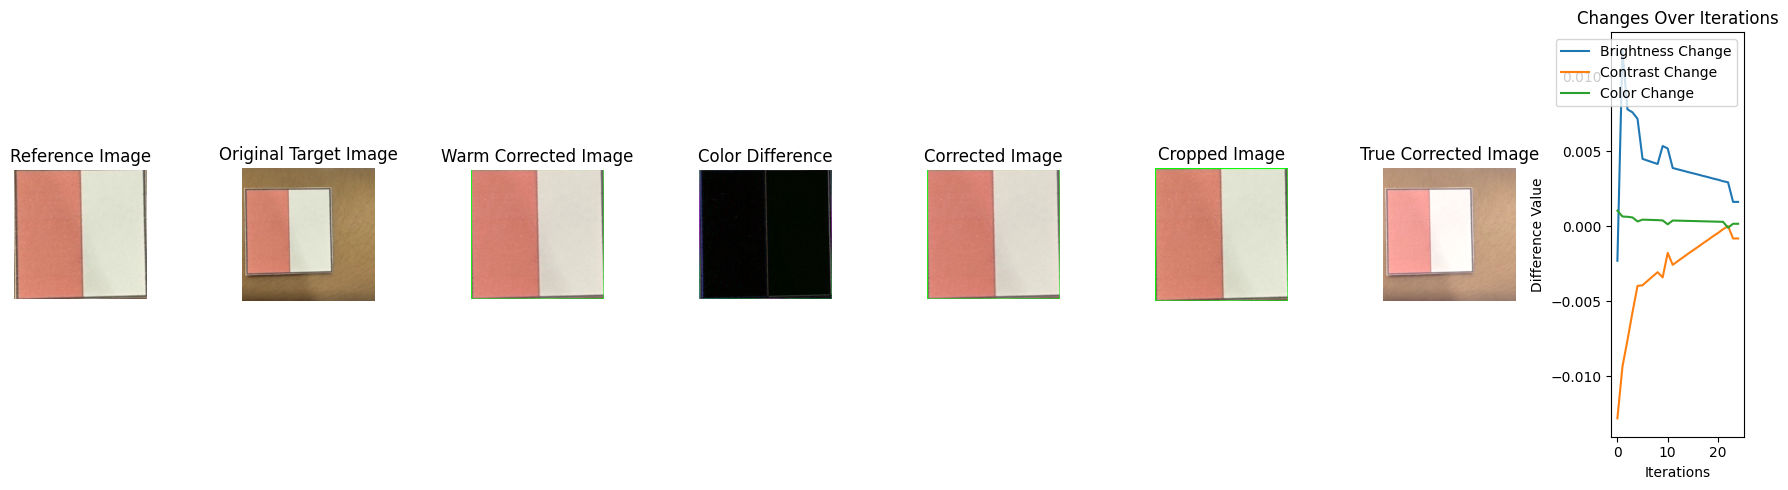

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded correctly.")
        return

    # ลด noise ก่อนแปลงภาพ
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    hsv = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Red': [(0, 100, 100), (10, 255, 255)],  
        'Red2': [(160, 100, 100), (180, 255, 255)],  
        'White': [(0, 0, 150), (180, 80, 255)]  # ปรับช่วงของสีขาว
    }


    color_positions = []
    combined_bbox = None

    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)

        # ลองเพิ่มการ Morphological Transform เพื่อลบ noise ออกจาก mask
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        matching_pixels = np.sum(mask > 0)
        print(f"Pixels matching {color}: {matching_pixels}")

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # ลดเงื่อนไขลงเพื่อให้หาเจอง่ายขึ้น
                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),
                        min(combined_bbox[1], y),
                        max(combined_bbox[2], x + w),
                        max(combined_bbox[3], y + h)
                    )

    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")

    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        
        # Convert cropped image to RGB
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        return cropped_img_rgb  # Return cropped image for further use
    else:
        print("No valid colors detected!")
        return None

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.00001) * (1 + contrast_diff) + 0.001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.000001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def apply_adjustments(target_img, brightness_diff, contrast_diff, color_diff):
    # แปลงภาพเป็น float32 เพื่อการคำนวณที่แม่นยำ
    target_img = target_img.astype(np.float32) / 255.0

    # ปรับค่าความสว่าง
    target_img += brightness_diff

    # ปรับคอนทราสต์
    target_img = (target_img - 0.5) * (1 + contrast_diff) + 0.5

    # ปรับโทนสี (R, G, B)
    target_img[:, :, 0] += color_diff[0]
    target_img[:, :, 1] += color_diff[1]
    target_img[:, :, 2] += color_diff[2]

    # คำนวณภาพสุดท้ายหลังการปรับ
    target_img = np.clip(target_img, 0, 1)

    # แปลงกลับเป็น uint8 และ return
    return (target_img * 255).astype(np.uint8)

def setpath(refpath , targetpath):
    reference_img = cv2.imread(refpath)  # ภาพต้นฉบับ
    target_img = cv2.imread(targetpath)  # ภาพที่ต้องการวิเคราะห์

    cropped_img_rgb = detect_colors(targetpath)  # Get cropped RGB image from color detection

    if reference_img is None or target_img is None or cropped_img_rgb is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img_ts = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.cvtColor(cropped_img_rgb, cv2.COLOR_BGR2RGB)
    target_img_as = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    adjusted_img = cv2.imread(targetpath)

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    brightness_changes = []
    contrast_changes = []
    color_changes = []

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0

    while True:
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.000001)

        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # Average color difference

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        target_img = warm_corrected_img

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff

    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)

    # ใช้ apply_adjustments สำหรับการปรับภาพใหม่
    true_corrected_img = apply_adjustments(
        adjusted_img, 
        total_brightness_change, 
        total_contrast_change, 
        np.array([total_color_change] * 3)  # ใช้ค่าเฉลี่ยของ total_color_change สำหรับ RGB
    )
    
    true_corrected_img_rgb = cv2.cvtColor(true_corrected_img, cv2.COLOR_BGR2RGB)
    
    # ปรับ true_corrected_img_rgb ให้มีสีเหมือน corrected_img_rgb
    corrected_avg_color = np.mean(corrected_img_rgb, axis=(0, 1))
    true_corrected_avg_color = np.mean(true_corrected_img_rgb, axis=(0, 1))
    color_adjustment = corrected_avg_color - true_corrected_avg_color

    adjusted_true_corrected_img = true_corrected_img_rgb.astype(np.float32) + color_adjustment
    adjusted_true_corrected_img = np.clip(adjusted_true_corrected_img, 0, 255).astype(np.uint8)
    true_corrected_img_rgb = adjusted_true_corrected_img
    
    fig, axes = plt.subplots(1, 8, figsize=(18, 5))
    axes[0].imshow(reference_img_rgb)
    axes[0].set_title("Reference Image")
    axes[0].axis("off")
    
    axes[1].imshow(target_img_ts)
    axes[1].set_title("Original Target Image")
    axes[1].axis("off")
    
    axes[2].imshow(warm_corrected_img_rgb)
    axes[2].set_title("Warm Corrected Image")
    axes[2].axis("off")
    
    axes[3].imshow(color_diff_rgb)
    axes[3].set_title("Color Difference")
    axes[3].axis("off")
    
    axes[4].imshow(corrected_img_rgb)
    axes[4].set_title("Corrected Image")
    axes[4].axis("off")
    
    axes[5].imshow(cropped_img_rgb)
    axes[5].set_title("Cropped Image")
    axes[5].axis("off")

    axes[6].imshow(true_corrected_img_rgb)
    axes[6].set_title("True Corrected Image")
    axes[6].axis("off")

    axes[7].plot(brightness_changes, label="Brightness Change")
    axes[7].plot(contrast_changes, label="Contrast Change")
    axes[7].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[7].set_title("Changes Over Iterations")
    axes[7].set_xlabel("Iterations")
    axes[7].set_ylabel("Difference Value")
    axes[7].legend()

    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    cv2.imwrite("true_corrected_img_rgb1.jpg", cv2.cvtColor(true_corrected_img_rgb, cv2.COLOR_RGB2BGR))
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    setpath('10.jpg' , 'wtest8.jpg')

Pixels matching Red: 32897
Pixels matching Red2: 0
Pixels matching White: 32490
Detected Color Positions:
Red: (14, 67, 134, 262)
White: (144, 66, 133, 258)
Combined Bounding Box: (14, 66, 277, 329)
Average color of reference image (RGB): [140.20284986 142.45219899 166.95971557]
Average color of corrected image (RGB): [139.99028583 142.3766132  166.62277092]
Average color of warm corrected image (RGB): [139.99028583 142.3766132  166.62277092]
Total Brightness Adjustment: -0.03922468423843384
Total Contrast Adjustment: -0.021335124969482422
Total Color Difference: 0.04037049405451398


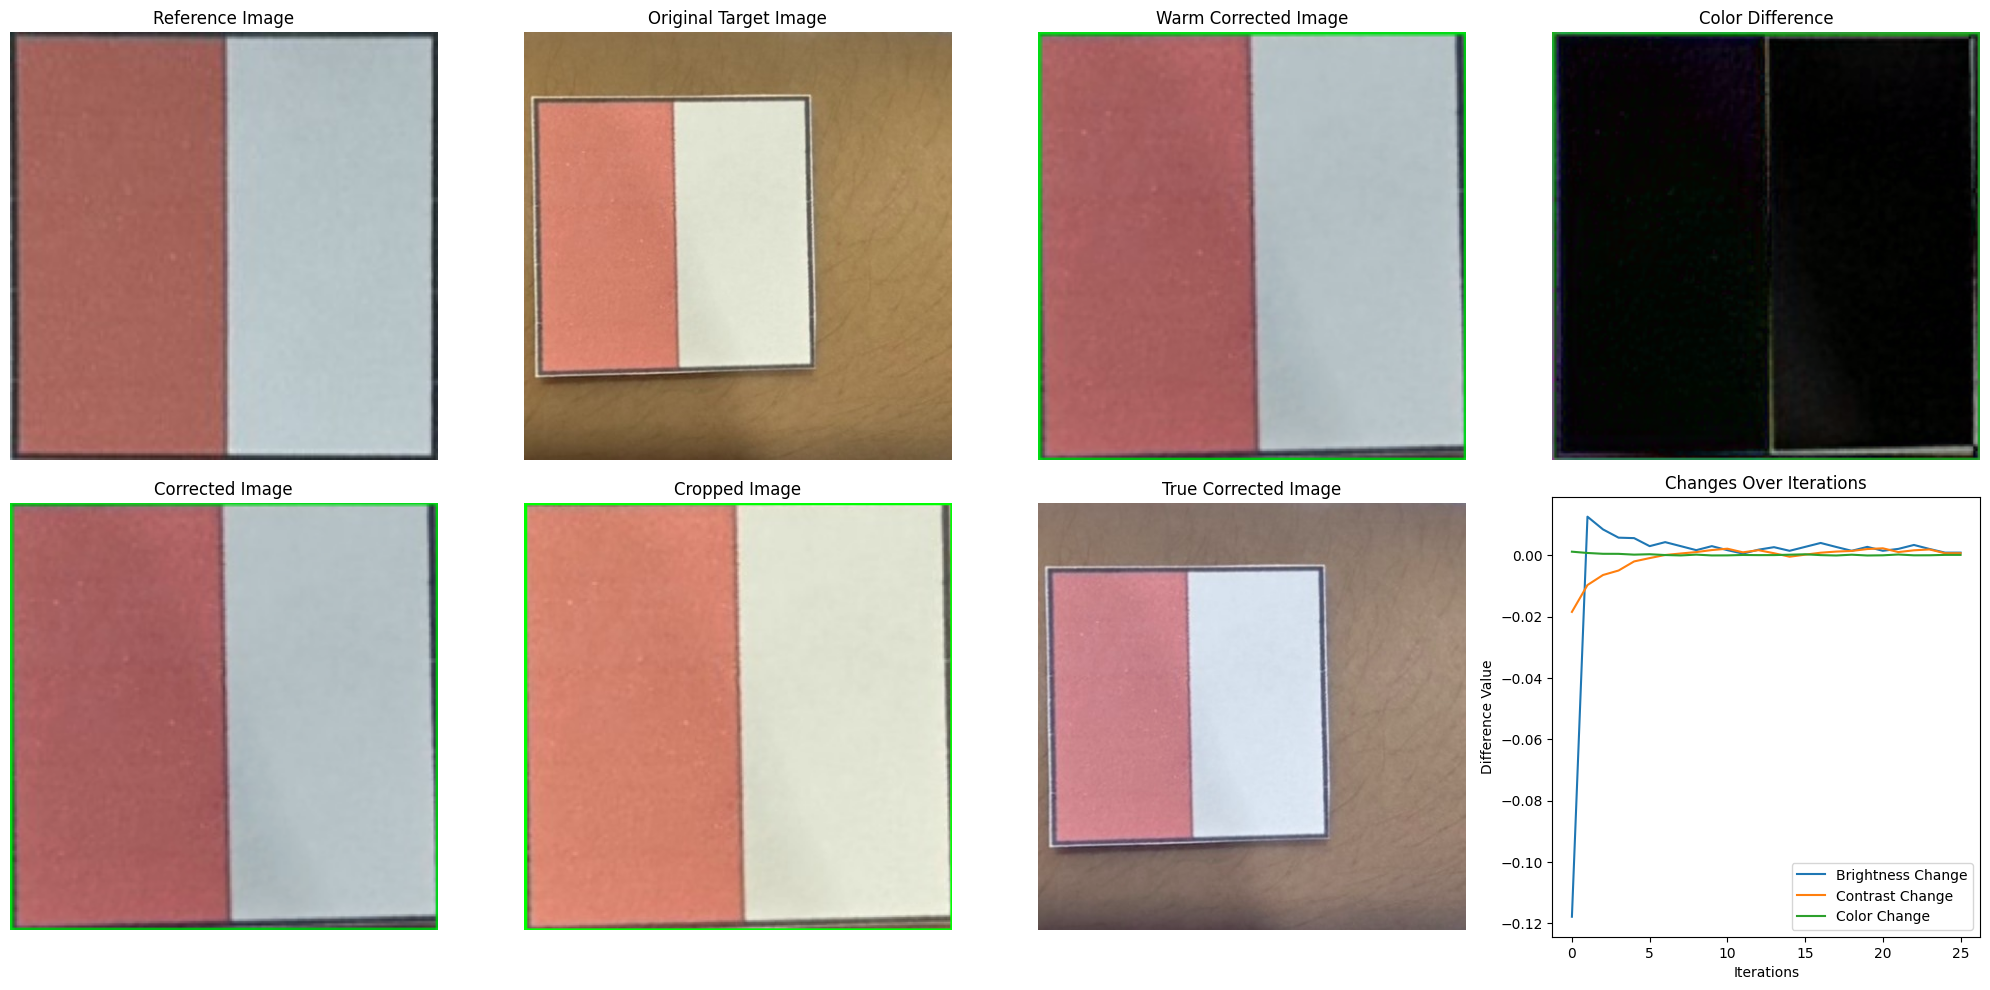

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_colors(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Image not loaded correctly.")
        return

    # ลด noise ก่อนแปลงภาพ
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    hsv = cv2.cvtColor(image_blur, cv2.COLOR_BGR2HSV)

    color_ranges = {
        'Red': [(0, 100, 100), (10, 255, 255)],  
        'Red2': [(160, 100, 100), (180, 255, 255)],  
        'White': [(0, 0, 150), (180, 80, 255)]  # ปรับช่วงของสีขาว
    }


    color_positions = []
    combined_bbox = None

    for color, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        mask = cv2.inRange(hsv, lower, upper)

        # ลองเพิ่มการ Morphological Transform เพื่อลบ noise ออกจาก mask
        kernel = np.ones((5, 5), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        matching_pixels = np.sum(mask > 0)
        print(f"Pixels matching {color}: {matching_pixels}")

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            if cv2.contourArea(cnt) > 500:  # ลดเงื่อนไขลงเพื่อให้หาเจอง่ายขึ้น
                x, y, w, h = cv2.boundingRect(cnt)
                color_positions.append((color, x, y, w, h))

                if combined_bbox is None:
                    combined_bbox = (x, y, x + w, y + h)
                else:
                    combined_bbox = (
                        min(combined_bbox[0], x),
                        min(combined_bbox[1], y),
                        max(combined_bbox[2], x + w),
                        max(combined_bbox[3], y + h)
                    )

    print("Detected Color Positions:")
    for color, x, y, w, h in color_positions:
        print(f"{color}: {(x, y, w, h)}")

    if combined_bbox:
        cv2.rectangle(image, (combined_bbox[0], combined_bbox[1]), (combined_bbox[2], combined_bbox[3]), (0, 255, 0), 2)
        print(f"Combined Bounding Box: {combined_bbox}")
        cropped_img = image[combined_bbox[1]:combined_bbox[3], combined_bbox[0]:combined_bbox[2]]
        
        # Convert cropped image to RGB
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
        return cropped_img_rgb  # Return cropped image for further use
    else:
        print("No valid colors detected!")
        return None

def adjust_brightness_contrast(reference_img, target_img):
    ref = reference_img.astype(np.float32) / 255.0
    target = target_img.astype(np.float32) / 255.0
    ref_avg_brightness = np.mean(ref)
    target_avg_brightness = np.mean(target)

    brightness_diff = ref_avg_brightness - target_avg_brightness
    contrast_diff = np.std(ref) - np.std(target)
    
    adjusted_target = target.copy()

    adjusted_target += brightness_diff
    adjusted_target = (adjusted_target - 0.00001) * (1 + contrast_diff) + 0.001
    adjusted_target = np.clip(adjusted_target, 0, 1)
    
    corrected_img = (adjusted_target * 255).astype(np.uint8)
    return corrected_img, brightness_diff, contrast_diff

def adjust_tone(reference_img, target_img, step=0.000001):
    reference_img = reference_img.astype(np.float32) / 255.0
    target_img = target_img.astype(np.float32) / 255.0
    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    target_avg_color = np.mean(target_img, axis=(0, 1))

    color_diff = ref_avg_color - target_avg_color

    # Scale the color difference to avoid overcorrection
    scale_factor = 0.1  # Adjust this as needed
    color_diff *= scale_factor

    adjusted_target = target_img.copy()
    adjusted_target += color_diff  # Directly add the difference

    adjusted_target[:, :, 0] *= (1 + color_diff[0] * step)
    adjusted_target[:, :, 1] *= (1 + color_diff[1] * step)
    adjusted_target[:, :, 2] *= (1 + color_diff[2] * step)

    adjusted_target = np.clip(adjusted_target, 0, 1)
    return (adjusted_target * 255).astype(np.uint8), color_diff

def calculate_color_difference(reference_img, corrected_img):
    color_diff = np.abs(reference_img.astype(np.float32) - corrected_img.astype(np.float32))
    return color_diff

def apply_adjustments(target_img, brightness_diff, contrast_diff, color_diff):
    # แปลงภาพเป็น float32 เพื่อการคำนวณที่แม่นยำ
    target_img = target_img.astype(np.float32) / 255.0

    # ปรับค่าความสว่าง
    target_img += brightness_diff

    # ปรับคอนทราสต์
    target_img = (target_img - 0.5) * (1 + contrast_diff) + 0.5

    # ปรับโทนสี (R, G, B)
    target_img[:, :, 0] += color_diff[0]
    target_img[:, :, 1] += color_diff[1]
    target_img[:, :, 2] += color_diff[2]

    # คำนวณภาพสุดท้ายหลังการปรับ
    target_img = np.clip(target_img, 0, 1)

    # แปลงกลับเป็น uint8 และ return
    return (target_img * 255).astype(np.uint8)

def setpath(refpath , targetpath):
    reference_img = cv2.imread(refpath)  # ภาพต้นฉบับ
    target_img = cv2.imread(targetpath)  # ภาพที่ต้องการวิเคราะห์

    cropped_img_rgb = detect_colors(targetpath)  # Get cropped RGB image from color detection

    if reference_img is None or target_img is None or cropped_img_rgb is None:
        print("Error: ไม่สามารถโหลดภาพได้")
        return

    target_img_ts = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    target_img = cv2.cvtColor(cropped_img_rgb, cv2.COLOR_BGR2RGB)

    target_img = cv2.resize(target_img, (reference_img.shape[1], reference_img.shape[0]))

    adjusted_img = cv2.imread(targetpath)

    previous_avg_diff = np.inf  # Start with the highest possible difference
    tolerance = 0.01  # Acceptable difference tolerance

    brightness_changes = []
    contrast_changes = []
    color_changes = []

    total_brightness_change = 0
    total_contrast_change = 0
    total_color_change = 0

    while True:
        corrected_img, brightness_diff, contrast_diff = adjust_brightness_contrast(reference_img, target_img)
        warm_corrected_img, color_diff = adjust_tone(reference_img, corrected_img, step=0.000001)

        brightness_changes.append(brightness_diff)
        contrast_changes.append(contrast_diff)
        color_changes.append(color_diff)

        total_brightness_change += brightness_diff
        total_contrast_change += contrast_diff
        total_color_change += np.mean(np.abs(color_diff))  # Average color difference

        corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
        current_avg_diff = np.abs(np.mean(reference_img, axis=(0, 1)) - corrected_avg_color).sum()

        if current_avg_diff < tolerance:
            break

        target_img = warm_corrected_img

        if abs(previous_avg_diff - current_avg_diff) < tolerance:
            break
        previous_avg_diff = current_avg_diff

    color_diff_result = calculate_color_difference(reference_img, corrected_img)
    
    reference_img_rgb = cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB)
    target_img_rgb = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
    corrected_img_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
    warm_corrected_img_rgb = cv2.cvtColor(warm_corrected_img, cv2.COLOR_BGR2RGB)
    color_diff_rgb = np.clip(color_diff_result, 0, 255).astype(np.uint8)

    # ใช้ apply_adjustments สำหรับการปรับภาพใหม่
    true_corrected_img = apply_adjustments(
        adjusted_img, 
        total_brightness_change, 
        total_contrast_change, 
        np.array([total_color_change] * 3)  # ใช้ค่าเฉลี่ยของ total_color_change สำหรับ RGB
    )
    
    true_corrected_img_rgb = cv2.cvtColor(true_corrected_img, cv2.COLOR_BGR2RGB)
    
    # ปรับ true_corrected_img_rgb ให้มีสีเหมือน corrected_img_rgb
    corrected_avg_color = np.mean(corrected_img_rgb, axis=(0, 1))
    true_corrected_avg_color = np.mean(true_corrected_img_rgb, axis=(0, 1))
    color_adjustment = corrected_avg_color - true_corrected_avg_color

    adjusted_true_corrected_img = true_corrected_img_rgb.astype(np.float32) + color_adjustment
    adjusted_true_corrected_img = np.clip(adjusted_true_corrected_img, 0, 255).astype(np.uint8)
    true_corrected_img_rgb = adjusted_true_corrected_img
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    axes[0, 0].imshow(reference_img_rgb)
    axes[0, 0].set_title("Reference Image")
    axes[0, 0].axis("off")
    
    axes[0, 1].imshow(target_img_ts)
    axes[0, 1].set_title("Original Target Image")
    axes[0, 1].axis("off")
    
    axes[0, 2].imshow(warm_corrected_img_rgb)
    axes[0, 2].set_title("Warm Corrected Image")
    axes[0, 2].axis("off")
    
    axes[0, 3].imshow(color_diff_rgb)
    axes[0, 3].set_title("Color Difference")
    axes[0, 3].axis("off")
    
    axes[1, 0].imshow(corrected_img_rgb)
    axes[1, 0].set_title("Corrected Image")
    axes[1, 0].axis("off")
    
    axes[1, 1].imshow(cropped_img_rgb)
    axes[1, 1].set_title("Cropped Image")
    axes[1, 1].axis("off")

    axes[1, 2].imshow(true_corrected_img_rgb)
    axes[1, 2].set_title("True Corrected Image")
    axes[1, 2].axis("off")

    axes[1, 3].plot(brightness_changes, label="Brightness Change")
    axes[1, 3].plot(contrast_changes, label="Contrast Change")
    axes[1, 3].plot([np.mean(diff) for diff in color_changes], label="Color Change")
    axes[1, 3].set_title("Changes Over Iterations")
    axes[1, 3].set_xlabel("Iterations")
    axes[1, 3].set_ylabel("Difference Value")
    axes[1, 3].legend()

    ref_avg_color = np.mean(reference_img, axis=(0, 1))
    corrected_avg_color = np.mean(corrected_img, axis=(0, 1))
    warm_corrected_avg_color = np.mean(warm_corrected_img, axis=(0, 1))

    print(f"Average color of reference image (RGB): {ref_avg_color}")
    print(f"Average color of corrected image (RGB): {corrected_avg_color}")
    print(f"Average color of warm corrected image (RGB): {warm_corrected_avg_color}")
    
    print(f"Total Brightness Adjustment: {total_brightness_change}")
    print(f"Total Contrast Adjustment: {total_contrast_change}")
    print(f"Total Color Difference: {total_color_change}")
    
    cv2.imwrite("true_corrected_img_rgb1.jpg", cv2.cvtColor(true_corrected_img_rgb, cv2.COLOR_RGB2BGR))

    plt.tight_layout()
    plt.savefig("result_plot.jpg", dpi=300)  # บันทึกภาพผลลัพธ์ทั้งหมดลงไฟล์เดียว
    plt.show()

if __name__ == "__main__":
    setpath('wtest2.jpg' , 'wtest8.jpg')